In [1]:
#pip install lightgbm


In [2]:
import joblib
import pandas as pd

In [3]:
data = pd.read_csv("GLCMResultFinal.csv", low_memory=False)
data = data.drop(['Unnamed: 0','image_type','tbp_tile_type','attribution','copyright_license','lesion_id','iddx_full','patient_id','isic_id'
                 ,"iddx_1","iddx_2","iddx_3","iddx_4","iddx_5","age_approx","mel_thick_mm","7","10","11","13","14"],axis = 1)

In [4]:
data.shape

(400000, 51)

In [5]:
data

,target,sex,anatom_site_general,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,...,1,2,3,4,5,6,8,9,12,15
0,1,female,anterior torso,9.27,18.093367,13.054772,19.090458,21.211776,26.302386,24.907158,...,0.992879,1.614020,0.472059,5.650503,0.037528,0.952930,0.240838,37.515355,5.879538,0.141073
1,1,male,head/neck,3.88,26.187010,21.394010,25.553420,24.914770,36.588750,32.839750,...,0.998616,1.438920,0.526167,4.973141,0.088282,0.991787,0.315452,29.518401,4.764154,0.181296
2,1,male,anterior torso,6.55,33.480140,24.249430,26.160100,25.295430,42.488470,35.041320,...,0.976854,2.008492,0.403345,8.597085,0.034536,0.849163,0.192565,56.186421,7.140923,0.150849
3,1,male,upper extremity,5.27,25.872050,20.194650,26.805590,28.459890,37.254570,34.896840,...,0.973226,1.863920,0.404943,6.184975,0.042374,0.832057,0.194337,38.999721,6.448128,0.180971
4,1,male,posterior torso,5.29,30.966662,22.008635,24.066940,26.734379,39.219278,34.628125,...,0.980691,1.882010,0.409715,6.650251,0.038820,0.877775,0.197552,42.312589,6.516821,0.165631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0,female,posterior torso,3.10,20.396390,8.700477,19.498260,22.526430,28.216930,24.148250,...,0.993499,0.700879,0.693530,1.181281,0.080221,0.964553,0.436643,6.484213,2.356538,0.211512
399996,0,male,upper extremity,2.66,18.325057,14.385684,27.391522,25.084622,32.956080,28.916884,...,0.974921,1.771508,0.421346,5.659397,0.039210,0.857096,0.208423,32.171421,5.665769,0.164087
399997,0,female,upper extremity,4.66,21.155608,17.250798,27.887630,23.743460,35.003995,29.348627,...,0.969403,1.930678,0.393691,6.472789,0.040591,0.806044,0.183824,41.111117,6.841718,0.177144
399998,0,male,upper extremity,2.62,20.209510,16.428130,34.063210,31.104090,39.607160,35.175950,...,0.971324,1.683367,0.430196,4.941759,0.044474,0.823461,0.211837,30.236066,5.675103,0.182123


In [6]:
data.columns

Index(['target', 'sex', 'anatom_site_general', 'clin_size_long_diam_mm',
       'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C',
       'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext',
       'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean',
       'tbp_lv_deltaA', 'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB',
       'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity', 'tbp_lv_location',
       'tbp_lv_location_simple', 'tbp_lv_minorAxisMM',
       'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color',
       'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL',
       'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle',
       'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'mel_mitotic_index',
       'tbp_lv_dnn_lesion_confidence', '0', '1', '2', '3', '4', '5', '6', '8',
       '9', '12', '15'],
      dtype='object')

In [7]:
non_numerical_columns = data.select_dtypes(exclude=['number']).columns

# Convert to a list if needed
non_numerical_columns_list = list(non_numerical_columns)

print(non_numerical_columns_list)

['sex', 'anatom_site_general', 'tbp_lv_location', 'tbp_lv_location_simple', 'mel_mitotic_index']


In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [10]:
import pickle

data_new = data
data1 = {}
save_file = open("cases.dat", "wb")

for j in non_numerical_columns_list:
    a = list(set(list(data_new[j])))
    index = 0
    dic = {}
    for i in a:
        dic[i] = index
        index += 1

    data1[j] = dic

pickle.dump(data1, save_file)
save_file.close()

In [11]:
data_file = open("cases.dat", "rb")
cases = pickle.load(data_file)
type(cases)
data_file.close()

In [12]:
for i in cases:
    for j in cases[i]:
        data_new[i] = data_new[i].replace(j, cases[i][j])
        

C:\Users\saiet\AppData\Local\Temp\ipykernel_11172\1112598091.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_new[i] = data_new[i].replace(j, cases[i][j])


In [13]:
data_new

,target,sex,anatom_site_general,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,...,1,2,3,4,5,6,8,9,12,15
0,1,2,4,9.27,18.093367,13.054772,19.090458,21.211776,26.302386,24.907158,...,0.992879,1.614020,0.472059,5.650503,0.037528,0.952930,0.240838,37.515355,5.879538,0.141073
1,1,0,3,3.88,26.187010,21.394010,25.553420,24.914770,36.588750,32.839750,...,0.998616,1.438920,0.526167,4.973141,0.088282,0.991787,0.315452,29.518401,4.764154,0.181296
2,1,0,4,6.55,33.480140,24.249430,26.160100,25.295430,42.488470,35.041320,...,0.976854,2.008492,0.403345,8.597085,0.034536,0.849163,0.192565,56.186421,7.140923,0.150849
3,1,0,5,5.27,25.872050,20.194650,26.805590,28.459890,37.254570,34.896840,...,0.973226,1.863920,0.404943,6.184975,0.042374,0.832057,0.194337,38.999721,6.448128,0.180971
4,1,0,2,5.29,30.966662,22.008635,24.066940,26.734379,39.219278,34.628125,...,0.980691,1.882010,0.409715,6.650251,0.038820,0.877775,0.197552,42.312589,6.516821,0.165631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0,2,2,3.10,20.396390,8.700477,19.498260,22.526430,28.216930,24.148250,...,0.993499,0.700879,0.693530,1.181281,0.080221,0.964553,0.436643,6.484213,2.356538,0.211512
399996,0,0,5,2.66,18.325057,14.385684,27.391522,25.084622,32.956080,28.916884,...,0.974921,1.771508,0.421346,5.659397,0.039210,0.857096,0.208423,32.171421,5.665769,0.164087
399997,0,2,5,4.66,21.155608,17.250798,27.887630,23.743460,35.003995,29.348627,...,0.969403,1.930678,0.393691,6.472789,0.040591,0.806044,0.183824,41.111117,6.841718,0.177144
399998,0,0,5,2.62,20.209510,16.428130,34.063210,31.104090,39.607160,35.175950,...,0.971324,1.683367,0.430196,4.941759,0.044474,0.823461,0.211837,30.236066,5.675103,0.182123


In [14]:
#data_new.to_csv('DatasetInitalComplete.csv',index=False)

In [15]:
classes = []
for column in non_numerical_columns_list:
    data[column] = le.fit_transform(data[column])
    print(le.classes_)
    classes.append(le.classes_)

[0 1 2]
[0 1 2 3 4 5]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[0 1 2 3 4 5 6 7]
[0 1 2 3 4 5 6 7]


In [16]:
data

,target,sex,anatom_site_general,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,...,1,2,3,4,5,6,8,9,12,15
0,1,2,4,9.27,18.093367,13.054772,19.090458,21.211776,26.302386,24.907158,...,0.992879,1.614020,0.472059,5.650503,0.037528,0.952930,0.240838,37.515355,5.879538,0.141073
1,1,0,3,3.88,26.187010,21.394010,25.553420,24.914770,36.588750,32.839750,...,0.998616,1.438920,0.526167,4.973141,0.088282,0.991787,0.315452,29.518401,4.764154,0.181296
2,1,0,4,6.55,33.480140,24.249430,26.160100,25.295430,42.488470,35.041320,...,0.976854,2.008492,0.403345,8.597085,0.034536,0.849163,0.192565,56.186421,7.140923,0.150849
3,1,0,5,5.27,25.872050,20.194650,26.805590,28.459890,37.254570,34.896840,...,0.973226,1.863920,0.404943,6.184975,0.042374,0.832057,0.194337,38.999721,6.448128,0.180971
4,1,0,2,5.29,30.966662,22.008635,24.066940,26.734379,39.219278,34.628125,...,0.980691,1.882010,0.409715,6.650251,0.038820,0.877775,0.197552,42.312589,6.516821,0.165631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0,2,2,3.10,20.396390,8.700477,19.498260,22.526430,28.216930,24.148250,...,0.993499,0.700879,0.693530,1.181281,0.080221,0.964553,0.436643,6.484213,2.356538,0.211512
399996,0,0,5,2.66,18.325057,14.385684,27.391522,25.084622,32.956080,28.916884,...,0.974921,1.771508,0.421346,5.659397,0.039210,0.857096,0.208423,32.171421,5.665769,0.164087
399997,0,2,5,4.66,21.155608,17.250798,27.887630,23.743460,35.003995,29.348627,...,0.969403,1.930678,0.393691,6.472789,0.040591,0.806044,0.183824,41.111117,6.841718,0.177144
399998,0,0,5,2.62,20.209510,16.428130,34.063210,31.104090,39.607160,35.175950,...,0.971324,1.683367,0.430196,4.941759,0.044474,0.823461,0.211837,30.236066,5.675103,0.182123


In [17]:
data[['sex', 'anatom_site_general', 'tbp_lv_location', 'tbp_lv_location_simple', 'mel_mitotic_index']]

,sex,anatom_site_general,tbp_lv_location,tbp_lv_location_simple,mel_mitotic_index
0,2,4,11,4,0
1,0,3,5,0,0
2,0,4,11,4,0
3,0,5,19,5,0
4,0,2,8,2,0
...,...,...,...,...,...
399995,2,2,18,2,0
399996,0,5,14,3,0
399997,2,5,13,5,0
399998,0,5,12,3,0


In [18]:
print(classes)

[array([0, 1, 2], dtype=int64), array([0, 1, 2, 3, 4, 5], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20], dtype=int64), array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64), array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)]


In [19]:
df_sorted = data.sort_values(by='target',ascending = False)
df_target_1 = data[data['target'] == 1]
df_target_0 = data[data['target'] == 0]

#df_target_0[:392]
batch1 = pd.concat([df_target_1, df_target_0[:392]], ignore_index=True)
batch1


,target,sex,anatom_site_general,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,...,1,2,3,4,5,6,8,9,12,15
0,1,2,4,9.27,18.093367,13.054772,19.090458,21.211776,26.302386,24.907158,...,0.992879,1.614020,0.472059,5.650503,0.037528,0.952930,0.240838,37.515355,5.879538,0.141073
1,1,0,3,3.88,26.187010,21.394010,25.553420,24.914770,36.588750,32.839750,...,0.998616,1.438920,0.526167,4.973141,0.088282,0.991787,0.315452,29.518401,4.764154,0.181296
2,1,0,4,6.55,33.480140,24.249430,26.160100,25.295430,42.488470,35.041320,...,0.976854,2.008492,0.403345,8.597085,0.034536,0.849163,0.192565,56.186421,7.140923,0.150849
3,1,0,5,5.27,25.872050,20.194650,26.805590,28.459890,37.254570,34.896840,...,0.973226,1.863920,0.404943,6.184975,0.042374,0.832057,0.194337,38.999721,6.448128,0.180971
4,1,0,2,5.29,30.966662,22.008635,24.066940,26.734379,39.219278,34.628125,...,0.980691,1.882010,0.409715,6.650251,0.038820,0.877775,0.197552,42.312589,6.516821,0.165631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0,0,1,2.60,14.650790,10.193410,26.928420,23.649110,30.655920,25.752400,...,0.975968,1.903894,0.397067,6.253643,0.036082,0.845603,0.186532,40.221675,6.843564,0.159063
780,0,0,2,2.74,32.605038,18.608346,24.924206,27.810967,41.040280,33.462224,...,0.968763,1.973693,0.390034,6.866960,0.041555,0.805747,0.187785,42.715990,6.731436,0.181829
781,0,0,2,2.60,19.215086,16.052908,31.111112,30.087717,36.566662,34.102295,...,0.919985,3.999221,0.234827,28.244347,0.024387,0.540037,0.105668,162.490711,12.408923,0.145897
782,0,2,5,3.01,25.150776,20.833629,26.230133,26.279075,36.339805,33.535502,...,0.974795,2.716658,0.337463,17.375553,0.031137,0.819706,0.150641,122.958959,10.495385,0.154720


In [20]:
#pip install matplotlib

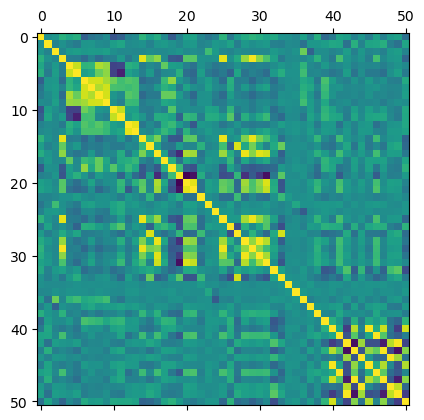

In [21]:
correlation_matrix = batch1.corr()
import matplotlib.pyplot as plt
plt.matshow(correlation_matrix, cmap='viridis')
plt.show()


In [22]:
correlated_pairs = []
threshold = 0.95
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if ((correlation_matrix.iloc[i, j]) > threshold):
            colname1 = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            correlated_pairs.append((colname1, colname2, correlation_matrix.iloc[i, j]))

# Print the correlated pairs
print("Pairs of columns with correlation above threshold:")
print(len(correlated_pairs))
for pair in correlated_pairs:
    print(f"Columns: {pair[0]} and {pair[1]} with correlation: {pair[2]:.2f}")

Pairs of columns with correlation above threshold:
8
Columns: tbp_lv_perimeterMM and clin_size_long_diam_mm with correlation: 0.98
Columns: tbp_lv_perimeterMM and tbp_lv_minorAxisMM with correlation: 0.95
Columns: tbp_lv_radial_color_std_max and tbp_lv_norm_color with correlation: 0.95
Columns: 5 and 0 with correlation: 0.97
Columns: 6 and 1 with correlation: 0.99
Columns: 8 and 3 with correlation: 0.98
Columns: 9 and 4 with correlation: 0.99
Columns: 12 and 2 with correlation: 0.98


In [23]:
#to remove : 

In [24]:
'''columns_to_remove = set()

# Track columns in pairs

for col1, col2, _ in correlated_pairs:
    # Add both columns to the set (removal strategy might choose one over another)
    columns_to_remove.add(col2)
    #columns_to_remove.add(col2)

print("Columns to consider for removal:")
print(columns_to_remove)

# Optionally, remove the columns from the DataFrame
batch1 = batch1.drop(columns=columns_to_remove)
print("\nReduced DataFrame:")
print(batch1)'''

'columns_to_remove = set()\n\n# Track columns in pairs\n\nfor col1, col2, _ in correlated_pairs:\n    # Add both columns to the set (removal strategy might choose one over another)\n    columns_to_remove.add(col2)\n    #columns_to_remove.add(col2)\n\nprint("Columns to consider for removal:")\nprint(columns_to_remove)\n\n# Optionally, remove the columns from the DataFrame\nbatch1 = batch1.drop(columns=columns_to_remove)\nprint("\nReduced DataFrame:")\nprint(batch1)'

In [25]:
#mid_point = len(batch1) // 2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
'''
batch1_first_half = batch1.iloc[:392]
batch1_second_half = batch1.iloc[392:]
test_size_first_half = int(0.1 * len(batch1_first_half))
test_size_second_half = int(0.1 * len(batch1_second_half))
test_first_half = batch1_first_half.sample(n=test_size_first_half, random_state=42)
test_second_half = batch1_second_half.sample(n=test_size_second_half, random_state=42)
test_set = pd.concat([test_first_half, test_second_half])
train_set = batch1.drop(test_set.index)'''
#test_set
scaler = StandardScaler()

train_set, test_set = train_test_split(batch1, test_size=0.2, stratify=batch1['target'], random_state=42)



In [26]:
X_train = train_set.drop(columns=['target'])
y_train = train_set['target']
X_test = test_set.drop(columns=['target'])
y_test = test_set['target']
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
X_test.shape

(157, 50)

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
model = DecisionTreeClassifier()

#X= batch1.drop(columns=['target'])
#y = batch1['target']
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
model.fit(X_train,y_train)
joblib.dump(model,'decision.joblib')
predictions = model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(tp/(tp+fn))
accuracy = accuracy_score(y_test,predictions)
accuracy

0.8333333333333334


0.7643312101910829

In [29]:
import lightgbm as lgb
model1 = lgb.LGBMClassifier()
model1.fit(X_train, y_train)
joblib.dump(model, 'lgbm.joblib')

# Make predictions and evaluate
predictions = model1.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(tp/(tp+fn))
accuracy = accuracy_score(y_test,predictions)
print(tp, tn , fp , fn)
accuracy

[LightGBM] [Info] Number of positive: 314, number of negative: 313
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9274
[LightGBM] [Info] Number of data points in the train set: 627, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500797 -> initscore=0.003190
[LightGBM] [Info] Start training from score 0.003190
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

0.8598726114649682

In [30]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'random_forest.joblib')

# Make predictions and evaluate
predictions = model2.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(tp, tn , fp , fn)
print(tp/(tp+fn))
accuracy = accuracy_score(y_test,predictions)
accuracy

68 61 18 10
0.8717948717948718


0.821656050955414

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model3 = LogisticRegression()

# Train the model
model3.fit(X_train, y_train)
predictions = model3.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(tp/(tp+fn))
accuracy = accuracy_score(y_test,predictions)
accuracy

0.8461538461538461


0.821656050955414

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
clf = MLPClassifier(random_state=1, max_iter=1000).fit(X_train, y_train)
clf.predict_proba(X_test)
predictions = clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(tp/(tp+fn))
accuracy = accuracy_score(y_test,predictions)
accuracy

#clf.score(X_test, y_test)

0.8333333333333334


0.8089171974522293

In [33]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=0, tol=1e-5,max_iter=100000))
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(tp/(tp+fn))
accuracy = accuracy_score(y_test,predictions)
accuracy

C:\Users\saiet\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


0.8333333333333334


0.821656050955414